Contenu du fichier : ['x', 'y']
Premiers points de x_data : [ 0  5 10 15 20]
Premiers points de y_data : [3.14783976 3.10260787 2.28184325 1.76162682 7.69227891]
Vitesse estimée a = 0.308
Position initiale b = 0.238
Erreur quadratique moyenne RMSE = 2.1948


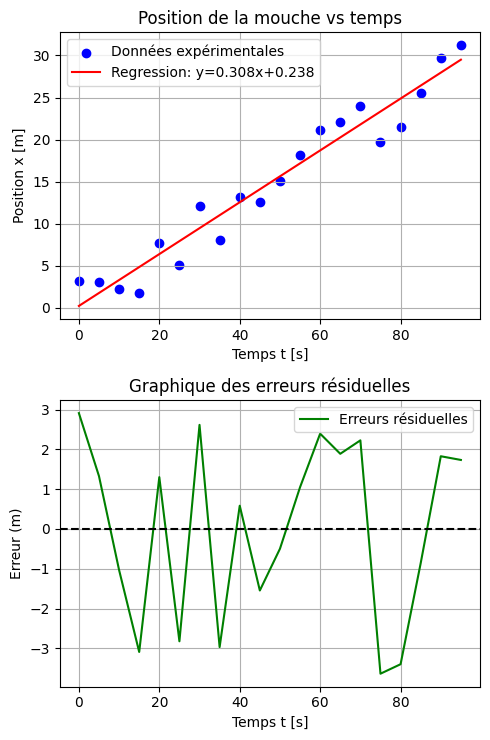

In [1]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
# 1️ Définir le chemin du fichier
file_path = os.path.join("data", "data_ex3.h5")  # chemin relatif vers le fichier
# Vérifier si le fichier existe
if not os.path.exists(file_path):
    raise FileNotFoundError(f"Fichier non trouvé : {file_path}\n"
                            "Assurez-vous que le fichier data_ex3.h5 est dans le dossier 'data'.")
# 2️ Charger les données
with h5py.File(file_path, "r") as f:
    print("Contenu du fichier :", list(f.keys()))
    x_data = np.array(f["x"])  # Temps t
    y_data = np.array(f["y"])  # Position x

print("Premiers points de x_data :", x_data[:5])
print("Premiers points de y_data :", y_data[:5])
# 3️ Fonction de régression linéaire
def my_lin_reg(x, y):
    """ Régression linéaire par moindres carrés.
    Retourne les coefficients a et b de y = a*x + b et les erreurs résiduelles. """
    x = np.array(x)
    y = np.array(y)

    # Cas où x est Nx2 ou liste de paires [[x_i, y_i], ...]
    if x.ndim == 2 and x.shape[1] == 2:
        y = x[:, 1]
        x = x[:, 0]

    N = len(x)  # nombre de points
    # Calcul des coefficients a et b
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_x2 = np.sum(x ** 2)
    sum_xy = np.sum(x * y)

    denominator = N * sum_x2 - sum_x ** 2
    if denominator == 0:
        raise ValueError("Erreur : division par zéro dans le calcul de a.")
    a = (N * sum_xy - sum_x * sum_y) / denominator  # pente (vitesse)
    b = (sum_y - a * sum_x) / N  # ordonnée à l'origine (position initiale)
    errors = y - (a * x + b)  # erreurs résiduelles
    return a, b, errors
# 4️ Appliquer la régression
a, b, errors = my_lin_reg(x_data, y_data)

# Arrondir a et b à 3 chiffres après la virgule
a_rounded = round(a, 3)
b_rounded = round(b, 3)

print(f"Vitesse estimée a = {a_rounded}")
print(f"Position initiale b = {b_rounded}")
# 5️ Calcul de l'erreur quadratique moyenne (RMSE)
rmse = np.sqrt(np.mean(errors ** 2))
print(f"Erreur quadratique moyenne RMSE = {rmse:.4f}")
# 6️ Tracer les deux graphiques dans une seule figure (2 sous-graphes)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=[5, 7.5])  # 2 sous-graphes verticalement
# Sous-graphe 1 : Position vs temps
ax1.scatter(x_data, y_data, color='blue', label='Données expérimentales')  # points expérimentaux
ax1.plot(x_data, a_rounded * x_data + b_rounded, color='red',
         label=f'Regression: y={a_rounded}x+{b_rounded}')  # droite de régression
ax1.set_xlabel("Temps t [s]")
ax1.set_ylabel("Position x [m]")
ax1.set_title("Position de la mouche vs temps")
ax1.legend()
ax1.grid(True)
# Sous-graphe 2 : Erreurs résiduelles (courbe)
ax2.plot(x_data, errors, color='green', label='Erreurs résiduelles')  # ligne des résidus
ax2.axhline(0, color='black', linestyle='--')  # ligne de référence y=0
ax2.set_xlabel("Temps t [s]")
ax2.set_ylabel("Erreur (m)")
ax2.set_title("Graphique des erreurs résiduelles")
ax2.legend()
ax2.grid(True)

plt.tight_layout()  # ajuste les marges pour éviter chevauchements
plt.show()